In [ ]:
#Установим зависимости

In [1]:
# !pip install xgboost==0.90
# !pip install catboost

     -------------------------------------- 18.3/18.3 MB 348.9 kB/s eta 0:00:00
     -------------------------------------- 101.0/101.0 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 15.3/15.3 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00


In [117]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

%matplotlib inline

In [115]:
test_df = pd.read_csv('Test.csv')
train_df = pd.read_csv('Train.csv')

In [93]:
train_df.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,560,NaN,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,4510000
1,1,2011-1,667,NaN,10,50,2,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,13231000
2,2,2011-1,90,0.0,1,48,2,0,25.0,0.0,...,0,0,0,0,0,0,0,0,0,2008000
3,3,2011-1,94,1.0,3,62,3,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,12680000
4,4,2011-1,232,0.0,3,60,3,0,25.0,NaN,...,0,0,0,0,0,0,0,0,0,3335000


In [4]:
test_df.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
0,100000,2012-3,459,NaN,1,60,3,1,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,100001,2012-3,344,1.0,10,52,2,1,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,100002,2012-3,585,0.0,4,54,3,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,100003,2012-3,494,NaN,2,52,2,1,25.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,100004,2012-3,622,1.0,9,60,3,1,15.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [90]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94563 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          94563 non-null  int64  
 1   date        94563 non-null  int32  
 2   street_id   94563 non-null  int64  
 3   build_tech  94563 non-null  float64
 4   floor       94563 non-null  int64  
 5   area        94563 non-null  int64  
 6   rooms       94563 non-null  int64  
 7   balcon      94563 non-null  int64  
 8   metro_dist  94563 non-null  float64
 9   g_lift      94563 non-null  float64
 10  n_photos    94563 non-null  int64  
 11  kw1         94563 non-null  int64  
 12  kw2         94563 non-null  int64  
 13  kw3         94563 non-null  int64  
 14  kw4         94563 non-null  int64  
 15  kw5         94563 non-null  int64  
 16  kw6         94563 non-null  int64  
 17  kw7         94563 non-null  int64  
 18  kw8         94563 non-null  int64  
 19  kw9         94563 non-nul

In [ ]:
# Преобразуем датасет

In [94]:
train_df["build_tech"][train_df["build_tech"].isna() == True] = train_df["build_tech"].mean()
train_df["g_lift"][train_df["g_lift"].isna() == True] = train_df["g_lift"].mean()
train_df["date"] = train_df["date"].str.replace("-", "").astype(int)
train_df["metro_dist"][train_df["metro_dist"].isna() == True] = train_df["metro_dist"].mean()

y = train_df.loc[:, "price"].astype(int)

C:\Users\denok\AppData\Local\Temp\ipykernel_16720\4061699338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["build_tech"][train_df["build_tech"].isna() == True] = train_df["build_tech"].mean()
C:\Users\denok\AppData\Local\Temp\ipykernel_16720\4061699338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["g_lift"][train_df["g_lift"].isna() == True] = train_df["g_lift"].mean()
C:\Users\denok\AppData\Local\Temp\ipykernel_16720\4061699338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

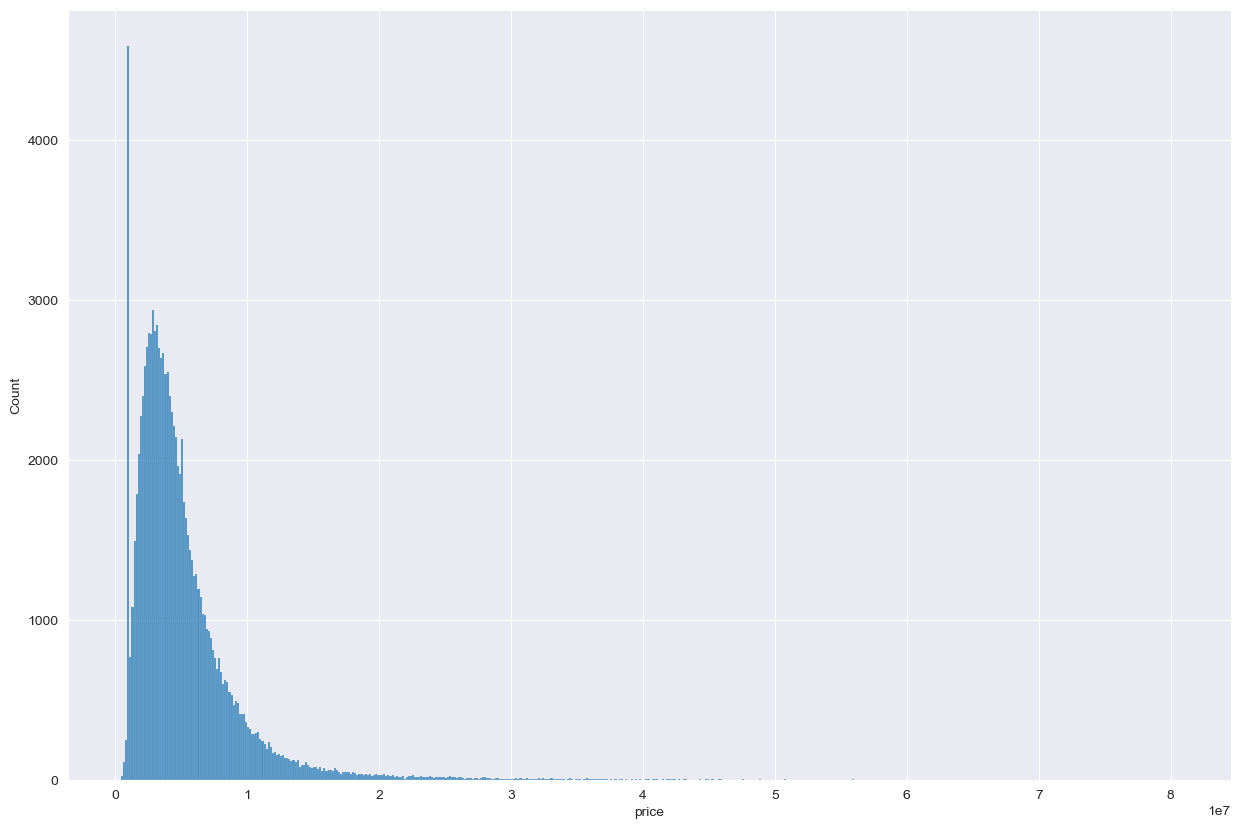

In [86]:
sns.histplot(y).figure.set_size_inches(15, 10)

In [95]:
most_frequently_encountered = train_df.price.mode()[0]
print(most_frequently_encountered)
train_df = train_df[(train_df.price != most_frequently_encountered) & (train_df.price < 2e+7)]

1000000


In [98]:
y = train_df.loc[:, "price"].astype(int)
X = train_df.iloc[:, 1:-1]

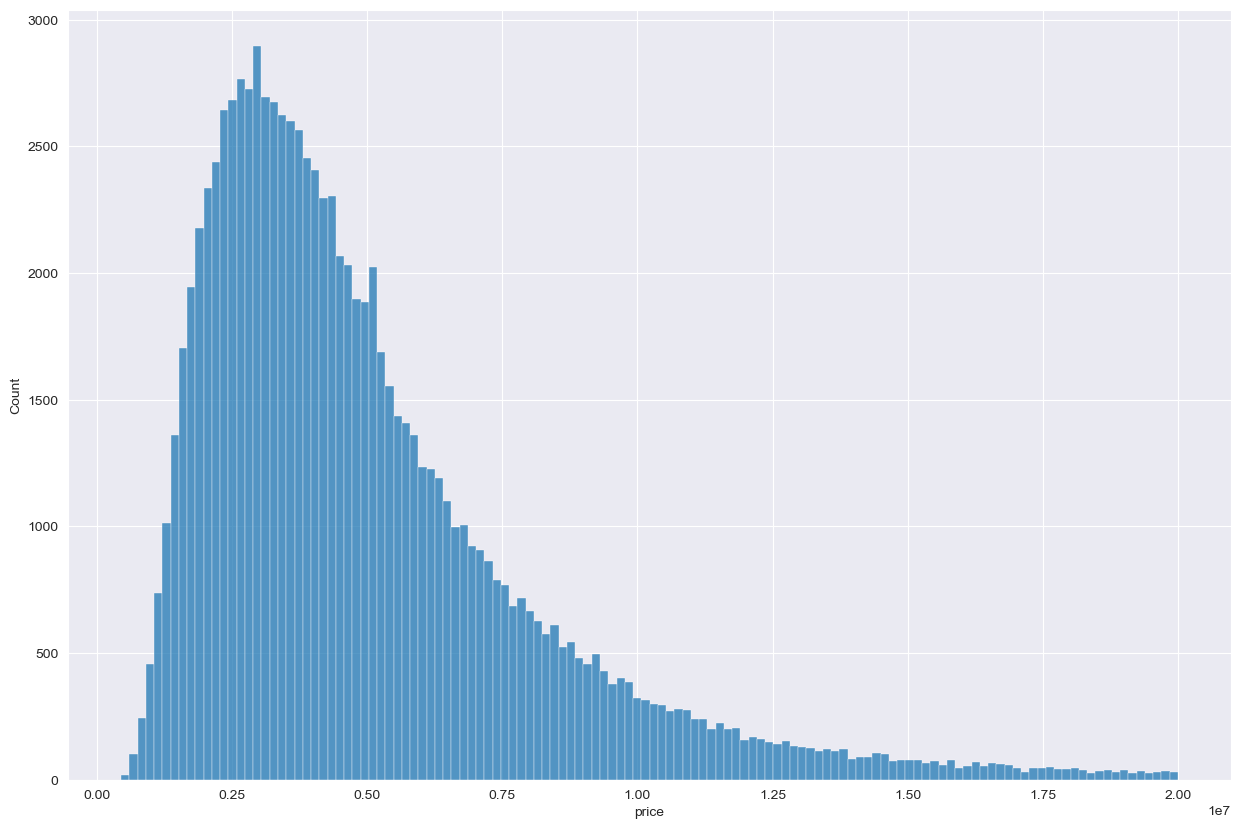

In [89]:
sns.histplot(y).figure.set_size_inches(15, 10)

In [ ]:
# Разделим на трейн и на тест выборки

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [27]:
#LineGBM Regression
lgbmr = LGBMRegressor(n_estimators=1000,max_depth=10)

lgbmr.fit(X_train, y_train)
y_pred = (lgbmr.predict(X_test))

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))


Test MAE = 1436813.5093


In [113]:
#XGBoost Regression с подобранными параметрами (параметры подбирал наивно, играясь с ними)
xgbr = XGBRegressor(n_estimators=900, max_depth=10, learning_rate=0.1,objective='reg:squarederror', booster='gbtree')

xgbr.fit(X_train, y_train)
y_pred = (xgbr.predict(X_test))

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))

Test MAE = 565549.5667


In [25]:
#CatBoost Regression с подобранными параметрами (параметры подбирал наивно, играясь с ними)
cbr = CatBoostRegressor(learning_rate=0.1,depth=10,n_estimators=800)

cbr.fit(X_train, y_train)
y_pred = (cbr.predict(X_test))

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))

0:	learn: 3978844.4776048	total: 23ms	remaining: 18.4s
1:	learn: 3809830.6952606	total: 44.6ms	remaining: 17.8s
2:	learn: 3660484.2265552	total: 67.8ms	remaining: 18s
3:	learn: 3529690.5660533	total: 89.7ms	remaining: 17.9s
4:	learn: 3413005.2238561	total: 111ms	remaining: 17.7s
5:	learn: 3322382.9068219	total: 132ms	remaining: 17.4s
6:	learn: 3236909.4658417	total: 151ms	remaining: 17s
7:	learn: 3161741.4939623	total: 170ms	remaining: 16.8s
8:	learn: 3097892.0979001	total: 188ms	remaining: 16.5s
9:	learn: 3045361.7546147	total: 207ms	remaining: 16.3s
10:	learn: 2999056.1544603	total: 226ms	remaining: 16.2s
11:	learn: 2958204.3164100	total: 246ms	remaining: 16.1s
12:	learn: 2924508.8078556	total: 264ms	remaining: 16s
13:	learn: 2893851.6534352	total: 286ms	remaining: 16.1s
14:	learn: 2869552.1429386	total: 308ms	remaining: 16.1s
15:	learn: 2844361.2195370	total: 328ms	remaining: 16.1s
16:	learn: 2823407.6871067	total: 348ms	remaining: 16s
17:	learn: 2804814.5009792	total: 366ms	remaini

In [34]:
# Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, max_depth=15)

rfr.fit(X_train, y_train)
y_pred = (rfr.predict(X_test))

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))

Test MAE = 1707912.5101


In [54]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=150, max_depth=11)

gbr.fit(X_train, y_train)
y_pred = (gbr.predict(X_test))

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))

Test MAE = 1070223.9920


In [53]:
# Decision Tree Regressor
dtr = DecisionTreeRegressor( max_depth=11)

dtr.fit(X_train, y_train)
y_pred = (dtr.predict(X_test))

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))

Test MAE = 1850066.5984


In [ ]:
# Лучше всего себе показал XG Boost

In [116]:
test_df["build_tech"][test_df["build_tech"].isna() == True] = test_df["build_tech"].mean()
test_df["g_lift"][test_df["g_lift"].isna() == True] = test_df["g_lift"].mean()
test_df["date"] = test_df["date"].str.replace("-", "").astype(int)
test_df["metro_dist"][test_df["metro_dist"].isna() == True] = test_df["metro_dist"].mean()


X_out = test_df.iloc[:, 1:]

test_df["price"] = xgbr.predict(X_out).astype(int)

test_df[["id", "price"]].to_csv("hw_5_kaggle.csv", index=False)


C:\Users\denok\AppData\Local\Temp\ipykernel_16720\397152474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["build_tech"][test_df["build_tech"].isna() == True] = test_df["build_tech"].mean()
C:\Users\denok\AppData\Local\Temp\ipykernel_16720\397152474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["g_lift"][test_df["g_lift"].isna() == True] = test_df["g_lift"].mean()
C:\Users\denok\AppData\Local\Temp\ipykernel_16720\397152474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc